# Support Vector Machines (SVM)

<img src="img/SVM_1.jpg" width="600">

* Tomamos los puntos como vectores en un espacio *p-dimensional*, donde *p* es el número de variables predictoras del dataset. Y el objetivo es separarlos en un espacio o hiperplano $p-1$ dimensional.
* En el ejemplo de arriba tenemos puntos en *2-D* (p=2), entonces queremo buscar un hiperplano de *1 dimensión* (una recta). En este ejemplo el hiperplano más optimo será la recta amarilla *(casi no se ve en el dibujo)*.
* Si el hiperplano existiera (no tiene porqué) se le conoce como **el hiperplano maximizador del márgen**.
* En el caso de la clasificación lineal, la más sencilla en SVM, se le denomina **el clasificador de maximización de los márgenes** o lo que es lo mismo **el perceptrón de estabilidad óptima**.

Matemáticamente para el caso en dónde exista una separabilidad lineal, cualquier punto *x* que esté en el hiperplano separador satisface lo siguiente:

<img src="img/SVM_2.jpg" width="600">

* **w** es el vector normal (perpendicular) al hiperplano.
* **b** es una constante que nos describe cómo ese plano está desplazado con respecto al origen.
* $d(0,H)$ es la distancia del hiperplano al origen.
* $d_+$ y $d_-$ nos indica la anchura del canal (o pasillo) que nos indica el márgen de separación.

Condiciones para la separación de la región superior e inferior:

<img src="img/SVM_3.jpg" width="600">

* **M** es el margen del corredor.
* **a** es un valor que no se conoce. Lo que hace es establecer la escala del vector *b*. Para empezar la podemos igualar a $a=1$ para maximizar ese márgen o corredor, para tener los elementos más alejados posibles de forma lineal.

El objetivo en definitiva para un problema que tenga *n* puntos en el dataset para entrenar es:

<img src="img/SVM_4.jpg" width="600">

* La existencia de la optimización de este hiperplano separador puede no existir, para ello se aplicará lo que viene debajo. 

# Linear Support Vector Classifier

* Extendemos el problema del hiperplano separador para poder desarrollar un hiperplano que 'casi' separe las clases, lo que lo llamaremos un **márgen débil**.

La generalización de ese problema de clasificación máximo, en el caso de no tener información separable se conoce como el problema del **Support Vector Classifier** *(el clasificador de soporte vectorial)*:

* Partiremos de una premisa básica: las clases se tendrán sobreponer *(overlapping)* en el espacio dimensional de los rasgos que nos haya dado el dataset.

<img src="img/SVM_clasi_1.jpg" width="600">

* En el dibujo tenemos la información separada pero algún punto azúl cae en la zona roja y vicerversa.
* Para ello podemos evitar en la medida de lo posible este overlapping, maximizando *M*. Para ello definimos unas variables adicionales llamadas **soporte vectorial**, que son las $\psi$, una para cada punto del dataset.
* Ahora ya podemos modificar las restricciones haciendo que la suma de las $\psi$ sean igual o menor que un valor **C** fijado a priori. De esta forma acotamos los errores.

Tenemos un problema de optimización de una ecuación cuadrática con resticciones linales (polinomios de grado uno), lo que se conoce como un **problema de optimización convexo**. Este tiene solución utilizándo los **multiplicadores de Lagrange**, que tendremos que transformarlo previamente en el **problema dual de Wolfe**.

Para ello tomamos la función que queremos minimizar y restarle todas y cada una de las restricciones que aparecen en el problema, de modo que:

<img src="img/SVM_clasi_2.jpg" width="600">

<img src="img/SVM_clasi_3.jpg" width="600">

<img src="img/SVM_clasi_3_1.jpg" width="600">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm #super vector machine

In [2]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

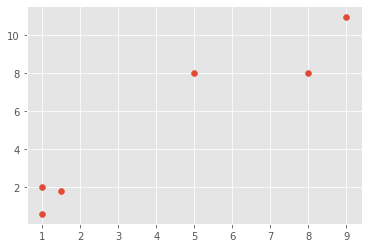

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
data = np.array(list(zip(X,Y)))

In [5]:
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [6]:
#etiquetamos los puntos como 1 o como 0 (algortimo supervisado), puntos de la esquina inferior como 0, el resto 1
target = [0, 1, 0, 1, 0, 1] 

In [15]:
#creamos el clasificador de elementos. Tipo de separador(Kernel) linal(hiperplano=1 que es una recta)
#C es una forma de indicar como de mal queremos que sea la clasificación(ver teoría para ampliar esto)
classifier = svm.SVC(kernel="linear", C = 1.0) #ver teoria para los kernel y la C
classifier.fit(data, target) #data con variable predictora(o separadadora) target

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**Una vez la fase de aprendizaje ya está listo(el modelo ha aprendido de nuestros datos). Ahora ya podemos predecir o probar nuevos datos para ver si cae en el grupo de 0 o el de 1**

In [17]:
p = np.array([10.32, 12.67]).reshape(1,2) #probamos con el puntos 10.32,12.67, se lo tenemos que dar en el formato dado por reshape, sino no lo pilla bien
print(p)
classifier.predict(p)

[[10.32 12.67]]


array([1])

* **Vemos que cae en la catergoria 1**

### Representaicón gráfica del separador con ggplot

* Modelo: w0 . x + w1 . y + e = 0 (w es el peso)
* Ecuación del hiperplano en 2D: y = a . x + b 

In [19]:
#classifier es un array de array, sacamos el array que hay en la posicion 0(que son los pesos para la categoria 0 y la 1)
w = classifier.coef_[0] 
w

array([0.1380943 , 0.24462418])

In [10]:
a = -w[0]/w[1] #pendiente de la recta, se calcula así
a

-0.5645161290322581

In [11]:
b = - classifier.intercept_[0]/w[1] #ordenada en el origen de la recta
b

6.734677437813051

In [20]:
xx = np.linspace(0,10) #generamos un vector de numeros entre 0 y 10
yy = a * xx + b

[]

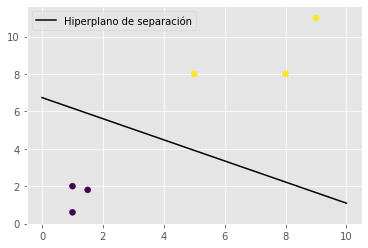

In [13]:
plt.plot(xx, yy, 'k-', label = "Hiperplano de separación")
plt.scatter(X, Y, c = target)
plt.legend()
plt.plot()